# ML Assigntent 1 

## Overview

**Assignment Brief**: Airbnb business analysis using data science approach

**Sourse**: 
New York City Airbnb Open Data (Airbnb listings and metrics in NYC, NY, USA (2019))

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

**Context**:
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

**Content**:
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

* Dataset is unlabelled
* Number of Instances: 48895 
* Number of Attributes: 16 


### Metadata:

* id - id number that identifies the property
* name - Property name
* host_id - id number that identifies the host
* host_name - Host name
* neighbourhood_group - The main regions of the city
* neighbourhood - The neighbourhoods
* latitude - Property latitude
* longitude - Property longitude
* room_type - Type of the room
* price - The price for one night
* minimum_nights - Minimum amount of nights to book the place
* number_of_reviews - Number of reviews received
* last_review - Date of the last review
* reviews_per_month - Amount of reviews per month
* calculated_host_listings_count - Number of properties available on Airbnb owned by the host
* availability_365 - Number of days of availability within 365 days

### Tasks: 

* #### **TASK 1 (Business analytic question)**

Propose an interesting business analytic question that can be answered using the given Airbnb dataset. The proposed question should be useful for Airbnb.

* **Business questions:**

The board of directors at Airbnb is actively seeking to analyse specific segments of the real estate market for potential investment opportunities. Specifically, they are interested in exploring the feasibility of investing in the construction or acquisition of long-term rental properties, specifically "entire home/apartment" formats, in New York City. In this report, we aim to address a series of business questions they have posed:

**1. Overall Market Landscape:** What is the current economic landscape of the New York City market for long-term rental properties exceeding 30 days or 1 month in the "entire home/apartment" format?

**2. Neighbourhood Group Analysis:** Which neighbourhood groups within New York City demonstrate notable popularity and demand for long-term rentals of "entire home/apartment" properties, and to what extent?

**3. Neighbourhood Analysis:** Which specific neighbourhoods within New York City hold investment potential for the construction or purchase of long-term rental properties in the "entire home/apartment" format? Furthermore, what is the level of desirability for such properties in these neighbourhoods?

**4. Pricing Analysis:** What are the average market prices for "entire home/apartment" long-term rentals within each identified neighbourhood group and specific neighbourhood?

**5. Additional Factors:** Are there any noteworthy findings or factors that should be taken into consideration which may significantly impact investment decisions in this context?

By addressing these questions, we aim to provide the board of directors with comprehensive insights and data-driven analysis to facilitate informed decision-making regarding potential investments in the long-term rental market for "entire home/apartment" properties in New York City.


* #### **TASK 2 (Data analysis)**

In this task, use your data analytics skills to answer the question posed in the Task 1. Depending upon your chosen question, you will typically have to perform:

* Exploratory Data Analysis (EDA), 
* Data Pre-processing, 
* Statistics-based Data Analysis, 
* Data Visualisation,
* Use Unsupervised Machine Learning Algorithms (e.g., clustering).

# [Part 0: Import, Settings, Load Data](#Part-0:-Import,-Settings,-Load-Data.)
* ### Import, Settings, Read data from ‘dataset.csv’ file

# [Part 1: Data Preprocessing](#Part-1:-Data-Preprocessing.)
* ### Info, Describe, Head, Unique Values, Missing values

# [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Numerical and Categorical attributes
    * #### List of Numerical and Categorical attributes
    * #### Numerical and Categorical attributes:  
        * Visualisation of Numerical attribures
        * Outliers
        * Visualisation for Categorical and Numerical attributes 
        * Business Questions Analysis
        * Encode Categorical into Numerical attributes

# [Part 3: Machine Learning](#Part-3:-Machine-Learning.)
* ### K-Means algorithm
    * #### Cluster 0: Head, Description, Visualisation
    * #### Cluster 1: Head, Description, Visualisation
    * #### Cluster 2: Head, Description, Visualisation
    * #### Cluster 3: Head, Description, Visualisation
    * #### All Clusters
* ### Save dataset in .csv file


# Part 0: Import, Settings, Load Data.

### Import 

In [1]:
# pip install folium
# pip install yellowbrick

import random 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

sns.set()
import scipy.stats as st
from scipy.stats import norm
from scipy.stats import iqr 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# report warnings
import warnings
warnings.filterwarnings('ignore')

### Settings

In [2]:
class Settings:
    """Settings is the class for EDA. 
    This class has 2 attributes:

    - distplot_attributes

    - boxplot_attributes
    """

    def distplot_attributes(self, data):
        """Plot multiple attributes using distplot"""
        
        cols = []
        
        # iterate over columns in the data
        for i in df.columns:
            # check if the column data type is float or int
            if df[i].dtypes == "float64" or df[i].dtypes == 'int64':
                cols.append(i)
        
        # create a figure for the subplots
        gp = plt.figure(figsize=(15,10))
        gp.subplots_adjust(wspace=0.2, hspace=0.4)
        
        # cterate over the selected columns
        for i in range(1, len(cols)+1):
            # add a subplot to the figure
            ax = gp.add_subplot(3,4,i)
            
            # clot the distribution using distplot
            sns.distplot(data[cols[i-1]], fit=norm, kde=False)
            
            # cet the title of the subplot
            ax.set_title('{}'.format(cols[i-1]))

            
    def boxplot_attributes(self, data):
        """Plot multiple attributes using boxplot"""
    
        cols = []
        
        # cterate over columns in the data
        for i in df.columns:
            # check if the column data type is float or int
            if df[i].dtypes == "float64" or df[i].dtypes == 'int64':
                cols.append(i)
    
        # create a figure for the subplots
        gp = plt.figure(figsize=(20,15))
        gp.subplots_adjust(wspace=0.2, hspace=0.4)
        
        # cterate over the selected columns
        for i in range(1, len(cols)+1):
            # cdd a subplot to the figure
            ax = gp.add_subplot(3,4,i)
            
            # clot the boxplot using boxplot
            sns.boxplot(x=cols[i-1], data=df)
            
            # cet the title of the subplot
            ax.set_title('{}'.format(cols[i-1]))


### Read data from ‘dataset.csv’ file

In [3]:
# read data from 'AB_NYC_2019.csv' file
df = pd.read_csv("AB_NYC_2019.csv")

# Part 1: Data Preprocessing.

### Info

In [4]:
# print the full summary of the dataset  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

The dataset consists of 48,895 entries and 16 columns/attributes.

It consists of three data types: float64 (3), int64 (7), object (6). This indicates that we have 10 numerical and 6 categorical attributes in our dataset.

Visually, there are missing values in the following attributes: 'name, 'host_name', 'last_review', 'reviews_per_month'.

### Describe

In [5]:
# describe the dataset
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Head

In [6]:
# preview of the first 5 lines of the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Check for unique values

In [7]:
# check for unique values
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

From this list, we can see that only the 'id' attribute is unique; there are no duplicates among the 48,895 rows.

We will assign the **'id'** attribute as the **index**. The reason is that when performing correlation analysis, it is common to exclude the index from the analysis because it represents a unique identifier rather than a numerical or categorical variable. Including the index in correlation calculations could lead to misleading or meaningless results.

In [8]:
# Assign 'id' as the index
df.set_index('id', inplace=True)

Since our business questions do not require information such as property name, host ID number, and host name, we can drop these columns.

In [9]:
# Drop the specified columns
columns_to_drop = ['name', 'host_id', 'host_name']
df.drop(columns=columns_to_drop, inplace=True)

### Missing values

As had been noticed before at **df.info()**, our dataset contains a lot of missing data.
Firstly, these missing values have to be found.

In [10]:
# list of attributes with missing values
total = \
    df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False)
        != 0]
percent = round(df.isnull().sum().sort_values(ascending=False)
                / len(df) * 100,
                2)[round(df.isnull().sum().sort_values(ascending=False)
                   / len(df) * 100, 2) != 0]
missing_data = pd.concat([total, percent], axis=1, keys=['Total',
                         'Percent'])
missing_data

,Total,Percent
last_review,10052,20.56
reviews_per_month,10052,20.56


There are 2 attributes with missing values across 48,895 rows. As noticed earlier in df.info(), the following attributes have missing values:

* 'reviews_per_month' is of type 'float64', therefore numerical.
* 'last_review' is of type 'object', therefore categorical.

<AxesSubplot:>

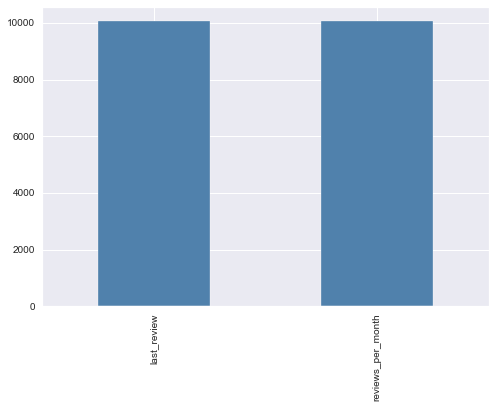

In [11]:
# visualisation of fields with missing values
sns.set_style('darkgrid')

missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='#5081ac')

* #### Considering attributes 'reviews_per_month', 'last_review', and 'availability_365'.

Now, taking into consideration our business questions, we need to conduct a more thorough exploration of two attributes, namely 'reviews_per_month' and 'last_review', before proceeding with the filling of missing values. Incorrectly filling in the missing data for these attributes could potentially impact our priority attribute, 'availability_365'.

For the purpose of further calculations, we will simplify the date-based attribute **'last_review'** (categorical) by considering only the **'year'** (numerical) component. 

In [12]:
df['last_review'] = pd.to_datetime(df['last_review']).dt.year

Attribute 'availability_365' has numerous '0' values, which can be interpreted in three different ways:

1. **Not Available**: One interpretation is that the value of 0 indicates that the property is not available for booking throughout the year. This could mean that the host does not rent out the property or that it is unavailable for other reasons such as renovations or personal use.

2. **Fully Booked**: Another possibility is that the value 0 represents that the property is fully booked for the entire year. This suggests that the host has already received bookings for all 365 days, leaving no availability for additional bookings.

3. **Missing Data**: It is also worth considering that the value 0 could signify missing or undefined data. In some cases, when hosts haven't provided information for the 'availability_365' attribute, a default value like 0 might be assigned. Treating 0 as 'Missing Data' acknowledges the absence of explicit availability information.

First, let's examine the number and % of '0' values in the 'availability_365' attribute.

In [13]:
condition = df[df['availability_365'] == 0]

# calculating the number of rows and percentage
num_rows = len(condition)
percentage = round((num_rows / len(df)) * 100, 2)

# displaying the results
zero_data = pd.DataFrame({'Total': [num_rows], 'Percent': [percentage]})
print(zero_data)

   Total  Percent
0  17533    35.86


It shows that there are a total of **17,533** instances where the attribute 'availability_365' equals 0, which accounts for approximately **35.86%** of the dataset.

Now let's examine how many of the **17,533** instances where **'availability_365' equals 0** also have **null values** for the attributes **'last_review' and 'reviews_per_month'**, and where **'number_of_reviews' equals 0**.

In [14]:
condition = df[(df['number_of_reviews'] == 0) & df['last_review'].isnull() & (df['reviews_per_month'].isnull()) & (df['availability_365'] == 0)]

# counting the number of rows that satisfy the conditions
num_rows = len(condition)

# calculating the percentage of filtered rows in the whole dataset
percentage = (num_rows / len(df)) * 100

# displaying the results
print("Total: ", num_rows)
print("Percent: ", percentage, "%")

Total:  4845
Percent:  9.90898864914613 %


It shows that there are a total of **4845** instances. **9.9%** of data can be concidered as a missing data. It is less than 10% of the whole dataset. So we can **drop it**.

In [15]:
# dropping the rows from the original DataFrame
df = df.drop(condition.index)

Let's recheck the remaining number of instances where 'availability_365' equals 0.

In [16]:
# filtering the dataset where 'availability_365' equals 0
condition = df[df['availability_365'] == 0]

# calculating the number of rows and percentage
num_rows = len(condition)
percentage = round((num_rows / len(df)) * 100, 2)

# displaying the results
zero_data = pd.DataFrame({'Total': [num_rows], 'Percent': [percentage]})
print(zero_data)

   Total  Percent
0  12688     28.8


It shows that there are a total of **12688** instances where the attribute 'availability_365' equals 0, which accounts for approximately **28.8%** of the dataset.


Now let's focus on identifying data that can be treated as **"Fully booked"**. We will consider instances where **'minimum_nights' is greater than or equal to 10**, **'number_of_reviews' is greater or equal to 37**,  **'last_review' is greater than or equal to 2019** and **'availability_365' is equal to 0**. When we find it we will change **'0' to '365'**.

In [17]:
# miltering the dataset based on the given conditions
condition = df[(df['minimum_nights'] >= 10) & (df['number_of_reviews'] >= 37) & (df['last_review'] >= 2019) & (df['availability_365'] == 0)]

# modifying the 'availability_365' column to change '0' to '365' for the filtered rows
df.loc[condition.index, 'availability_365'] = 365

# mounting the number of rows that satisfy the conditions
num_rows = len(condition)

# malculating the percentage of filtered rows in the whole dataset
percentage = (num_rows / len(df)) * 100

# misplaying the results
print("Total: ", num_rows)
print("Percent: ", percentage, "%")

Total:  18
Percent:  0.04086265607264472 %


The conditions we provided were met by only **18** instances in the dataset, and their 'availability_365' values were successfully changed fro **'0' to '365'**. The remaining **12670 instances or 28.76%** where 'availability_365' is still equal to 0 can be considered as **"Not Available"** based on the context of our analysis.

**Before** conducting our analysis, the attribute **'availability_365'** had **17,533 instances**, accounting for **35.86%** of values being equal to 0. **After** the analysis, we categorized the instances as follows:

**Not Available**: There are **12,670 instances**, which accounts for **28.76%** of the dataset.

**Fully Booked**: Only **18 instances**, representing **0.04%** of the dataset, were identified as fully booked.

**Missing Data**: There are **4,845 instances**, accounting for **9.9%** of the dataset, where the 'availability_365' attribute is missing or undefined.

Now we can drop unnecessary columns

In [18]:
# drop the specified columns
columns_to_drop = ['reviews_per_month', 'last_review']
df.drop(columns=columns_to_drop, inplace=True)

* #### Check for missing values

In [19]:
# dheck missing values again
df.isnull().sum().sum()

0

# Part 2: Exploratory Data Analysis.

### Numerical  and Categorical attributes

In [20]:
# check for Numerical and Categorical attribures in the dataset
numerical_feats = df.dtypes[df.dtypes != 'object'].index
print ('Quantity of Numerical features: ', len(numerical_feats))
print ()
print (df[numerical_feats].columns)
print ()
categorical_feats = df.dtypes[df.dtypes == 'object'].index
print ('Quantity of Categorical features: ', len(categorical_feats))
print ()
print (df[categorical_feats].columns)

Quantity of Numerical features:  7

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Quantity of Categorical features:  3

Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')


#### Visualisation of Numerical attributes

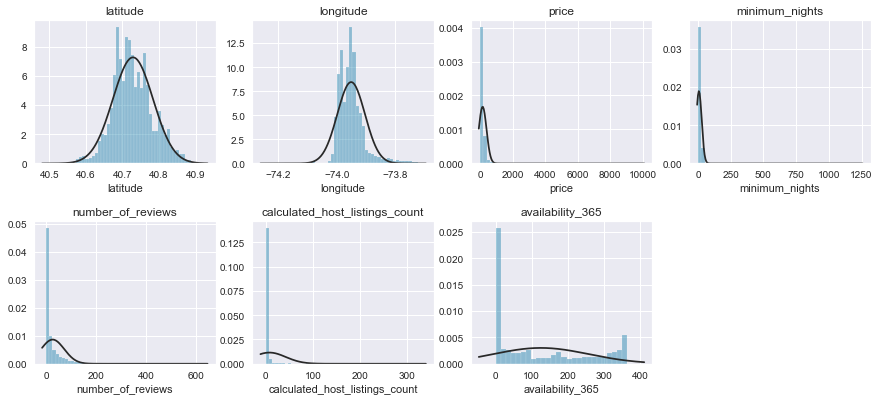

In [21]:
# visualisation of numerical attributes
data = Settings()
data.distplot_attributes(df)

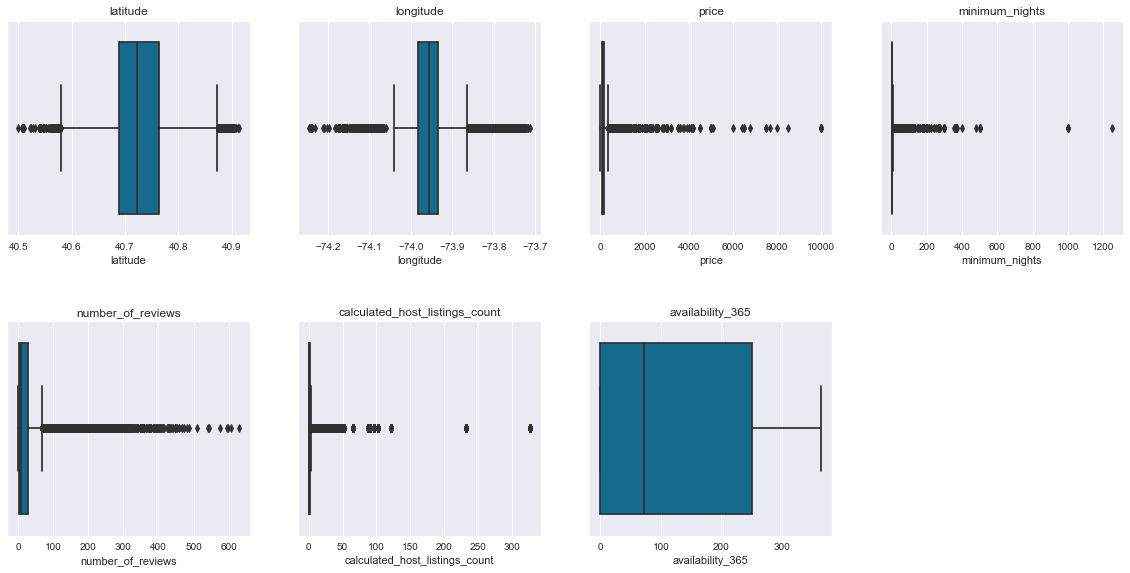

In [22]:
data.boxplot_attributes(df)

Visualization for categorical attributes we will explore a bit later.

### Outliers

The only attribute we will examine for outliers is 'price'.

* #### 'Price' attribute (visualisation: box plot)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

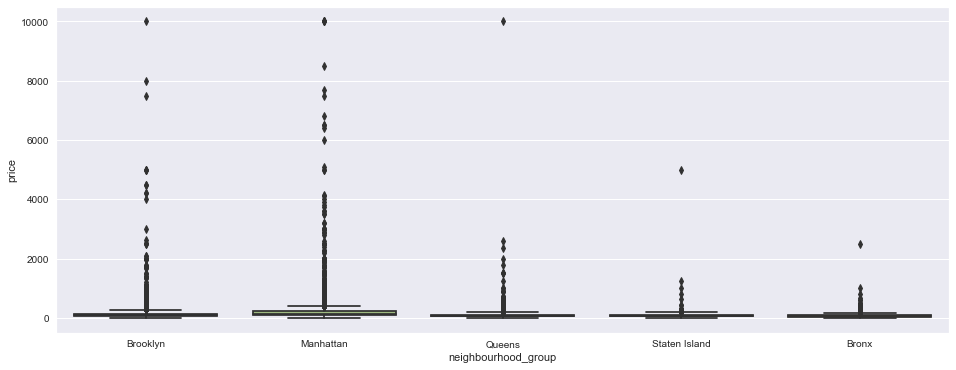

In [23]:
# 'price' attribute (visualisation: box plot)
plt.figure(figsize=(16, 6))
sns.boxplot(x="neighbourhood_group", y="price", data=df)


**'Price'** attribute shows **inconsistencies**.

**Brooklyn:**

**Likely:** An entire house or apartment in Brooklyn, near Greenpoint, could cost 10,000 dollars. 
A film location in Brooklyn can cost 8,000 dollars.

**Unlikely:** A private room in Brooklyn cannot cost 7,500 dollars. A private room in Brooklyn, near the Williamsburg Bridge, cannot cost 5,000 dollars.


**Manhattan:**

**Likely:** An entire house or apartment in Manhattan could cost 10,000 dollars.

**Unlikely:** A private room in Manhattan cannot cost 9,999 dollars.

**Queens:**

**Unlikely:** A private furnished room in Queens cannot cost 10,000 dollars.

**Staten Island:**

**Likely:** An entire house or apartment in Staten Island could cost 5,000 dollars.

**Bronx:**

**Likely:** A private room in the Bronx could cost 2,500 dollars.


Therefore, it has been decided to drop the rows that contain these inconsistencies.

In [24]:
# drop outliers
df = df.drop(df[(df['price'] >= 5000) & (df['neighbourhood_group'] == 'Brooklyn') & (df['room_type'] == 'Private room')].index)
df = df.drop(df[(df['price'] == 9999) & (df['neighbourhood_group'] == 'Manhattan') & (df['room_type'] == 'Private room')].index)
df = df.drop(df[(df['price'] == 10000) & (df['neighbourhood_group'] == 'Queens') & (df['room_type'] == 'Private room')].index)

Now, we can plot a scatterplot that illustrates the variation in listing prices in New York City, without considering extreme prices. By doing so, the scatterplot provides more informative insights into the price differences across different areas of the city. Please refer to the scatterplot below to visualize this.

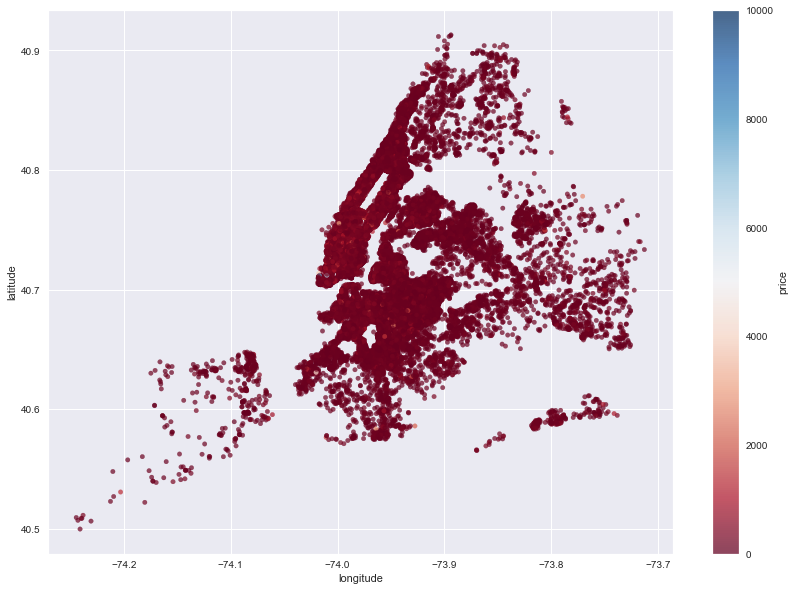

In [25]:
# visualisation 'longitude', 'latitude', and 'price'
plt.figure(figsize=(14,10))
ax = plt.gca()
df.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax, cmap=plt.get_cmap('RdBu'), colorbar=True, alpha=0.7);

### Visualisation

* ### 'neighbourhood_group' attribute (categorical)

<AxesSubplot:>

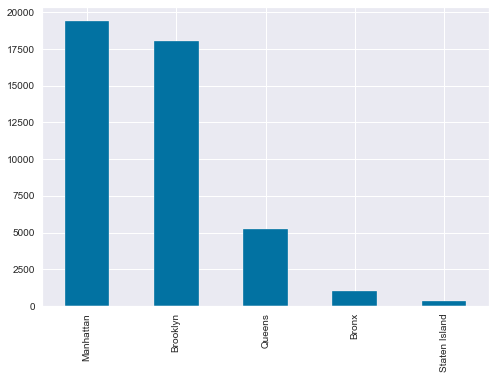

In [26]:
# visualisation of 'neighbourhood_group' 
df['neighbourhood_group'].value_counts().plot(x = df['neighbourhood_group'], kind='bar')

 #### Calculate average price per neighbourhood_group

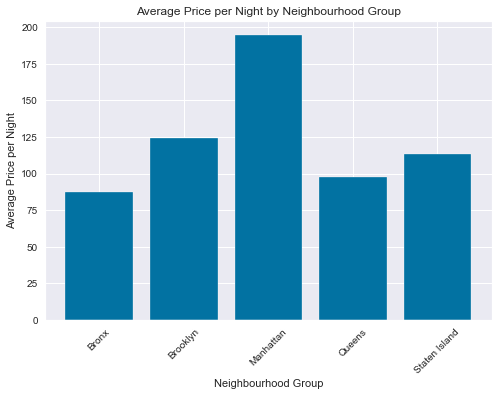

In [27]:
# visualisation of 'neighbourhood_group' and 'price'
avg_price = df.groupby('neighbourhood_group')['price'].mean()

# create bar plot
plt.bar(avg_price.index, avg_price)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price per Night')
plt.title('Average Price per Night by Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()

In [28]:
# describe 'neighbourhood_group'
set(df['neighbourhood_group'])
{'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'}
df.groupby('neighbourhood_group')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1034.0,87.122824,107.440996,0.0,45.0,65.0,99.0,2500.0
Brooklyn,18041.0,124.451915,174.567109,0.0,60.0,95.0,150.0,10000.0
Manhattan,19377.0,194.582959,280.585379,10.0,95.0,150.0,220.0,10000.0
Queens,5236.0,97.642857,101.123981,10.0,50.0,75.0,110.0,2600.0
Staten Island,358.0,113.192737,281.338486,13.0,50.0,75.0,109.0,5000.0


The table above provides a clear overview of the price distribution within each neighbourhood group as well as overall. The majority of Airbnb listings are concentrated in Manhattan and Brooklyn, which also happen to have the highest prices compared to the other regions. This can be attributed to the high demand in these areas, prompting more hosts to offer their rooms or apartments for rent.

* ### 'room_type' attribute (categorical)

To provide a more precise representation of the pricing, the table also includes a breakdown based on room type, ensuring a more detailed analysis of the prices.

<AxesSubplot:xlabel='room_type', ylabel='count'>

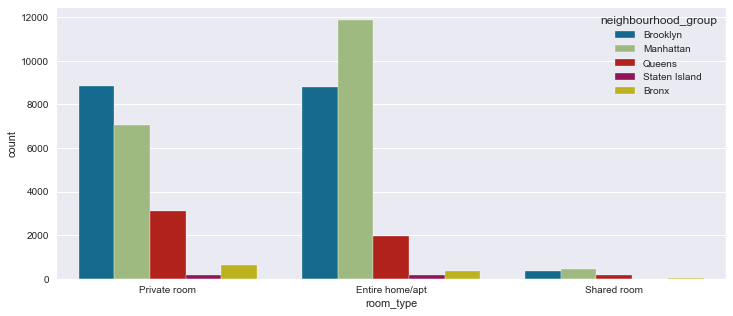

In [29]:
# visualisation 'room_type' and 'neighbourhood_group'
fig = plt.subplots(figsize = (12,5))
sns.countplot(x = 'room_type', hue = 'neighbourhood_group', data = df)

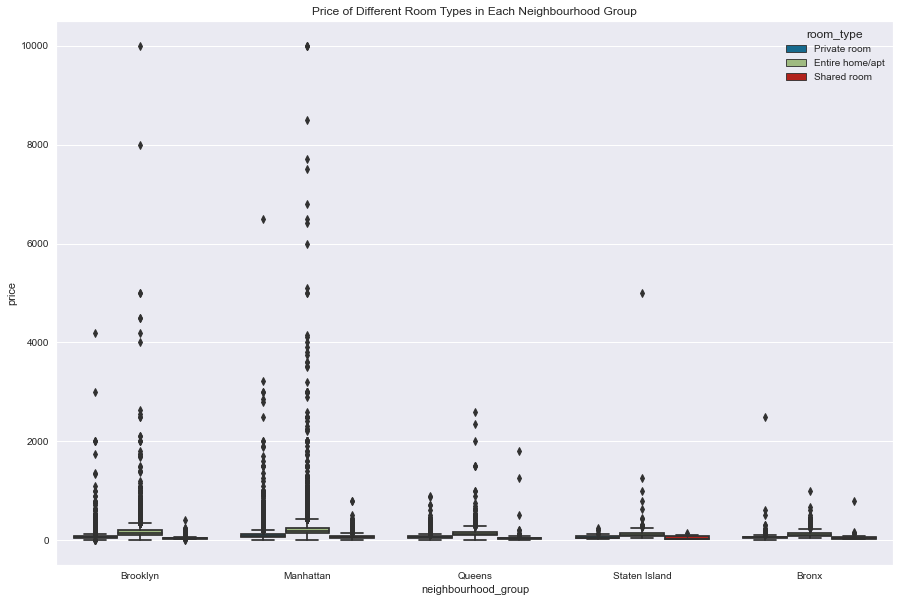

In [30]:
# visualisation 'neighbourhood_group', 'room_type', and 'price'
plt.figure(figsize=(15, 10))
sns.boxplot(x='neighbourhood_group', y='price', hue='room_type', data=df)
plt.title('Price of Different Room Types in Each Neighbourhood Group')
plt.show()

This countplot and boxplot shows that the highest number of private rooms is in Brooklyn, while the highest number of entire homes/apartments and shared rooms is in Manhattan.

In [31]:
# pivot table 'neighbourhood_group', 'room_type', and 'price'
df.pivot_table(index='neighbourhood_group',columns='room_type',values='price',aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,129.762712,65.402244,59.607143
Brooklyn,177.934620,74.510951,47.225201
Manhattan,245.878420,115.068551,84.767059
Queens,147.947125,68.076626,63.796703
Staten Island,173.832335,60.307692,57.444444


The pivot table indicates that Manhattan has the highest mean price for entire homes/apartments, private rooms, and shared rooms.

* ### 'minimum_nights' attribute

Let's investigate the average minimum number of nights per listing across different neighbourhood groups and room types.

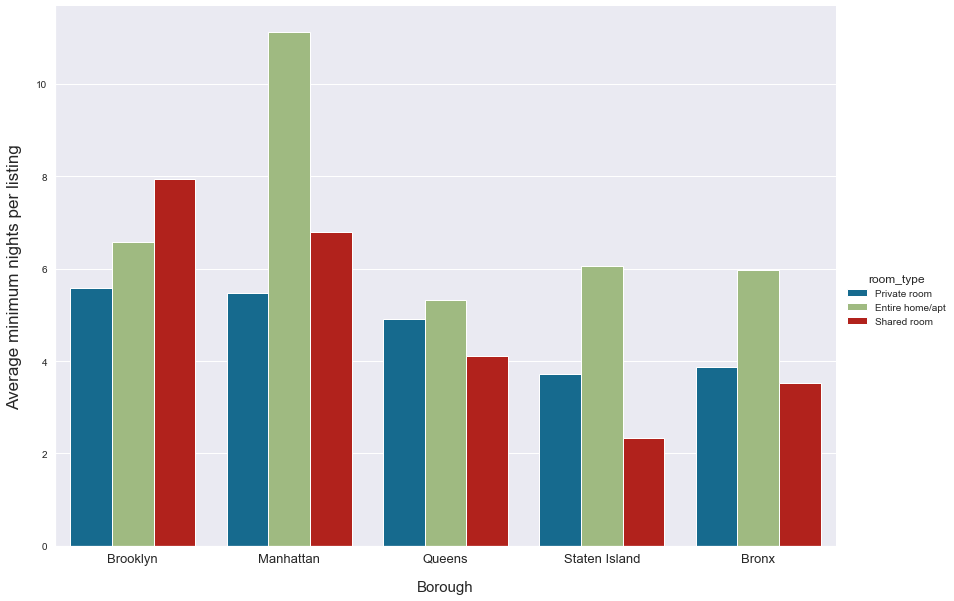

In [32]:
# visualisation 'minimum_nights' and 'room_type'
sns.catplot('neighbourhood_group', 'minimum_nights', hue = 'room_type', data = df, 
            kind = 'bar', ci = None, linewidth=1, edgecolor='w', height=8.27, aspect=11.7/8.27)
plt.xlabel('Borough', fontsize = 15, labelpad = 15)
plt.xticks(fontsize = 13)
plt.ylabel('Average minimum nights per listing',fontsize = 17, labelpad = 14);

In [33]:
# describe 'neighbourhood_group' and 'minimum_nights'
df.groupby('neighbourhood_group')['minimum_nights'].describe()                                  

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1034.0,4.570600,15.956540,1.0,1.0,2.0,3.0,365.0
Brooklyn,18041.0,6.120004,18.178374,1.0,2.0,3.0,4.0,999.0
Manhattan,19377.0,8.966920,24.895064,1.0,2.0,3.0,6.0,1250.0
Queens,5236.0,5.040871,14.495062,1.0,1.0,2.0,3.0,500.0
Staten Island,358.0,4.779330,20.035792,1.0,1.0,2.0,3.0,365.0


 The data indicates that more than 25% of Airbnb listings require only 1 night, while over half of the listings require 2 or 3 nights. This aligns with the fundamental principle of Airbnb as a short-term accommodation service.

* ### 'number_of_reviews' attribute

Let's examine the number of reviews for different neighbourhood groups and room types.

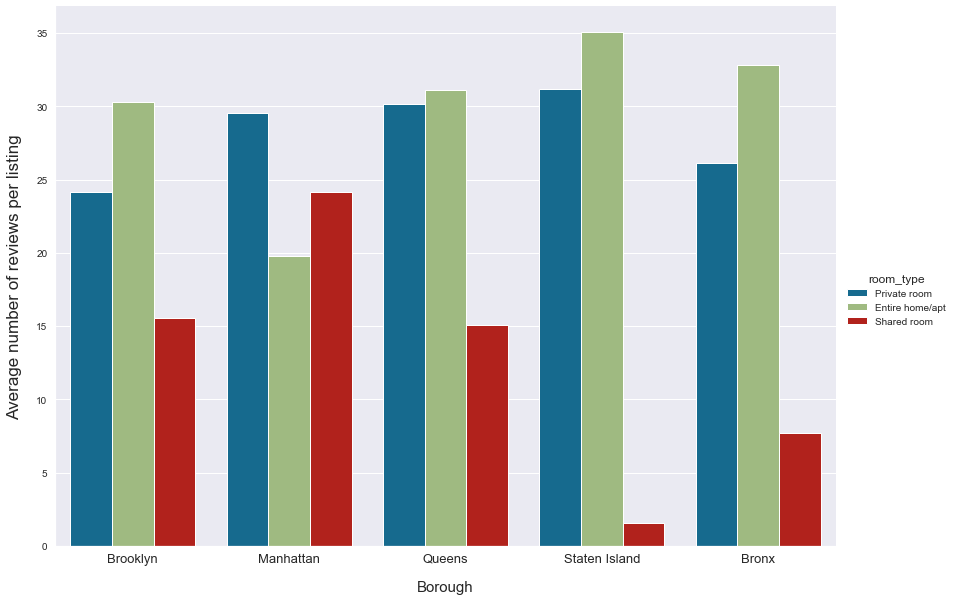

In [34]:
# visualisation 'number_of_reviews', 'neighbourhood_group', and 'room_type'
sns.catplot('neighbourhood_group', y = 'number_of_reviews', hue = 'room_type',  kind = 'bar', 
            ci = None, data = df, linewidth=1, edgecolor='w', height=8.27, aspect=11.7/8.27)
plt.xlabel('Borough', fontsize = 15, labelpad = 15)
plt.xticks(fontsize = 13)
plt.ylabel('Average number of reviews per listing', fontsize = 17, labelpad = 14);

The highest number of reviews for private rooms and entire home/apartments is observed in Staten Island, while for shared rooms, it is highest in Manhattan.

#### Price and reviews

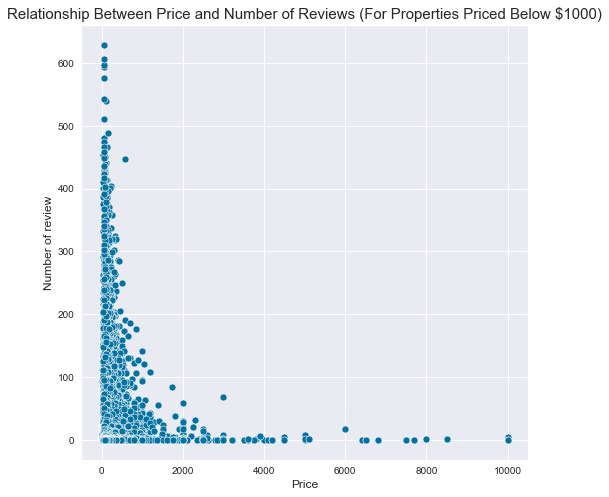

In [35]:
# visualisation 'number_of_reviews' and 'price'
plt.figure(figsize=(8,8))
sns.scatterplot(x='price',y='number_of_reviews',data=df[df.price<=10000])
plt.title("Relationship Between Price and Number of Reviews (For Properties Priced Below $1000)",fontsize=15)
plt.xlabel("Price",fontsize=12)
plt.ylabel("Number of review",fontsize=12)
plt.show()

Based on the plot above, it is evident that properties within the price range of 0-400 USD tend to have higher numbers of reviews. As the price for the property increases, the maximum number of reviews observed is 200.

* ### 'longitude' and 'latitude' attributes

Let's explore the relationship between price, latitude/longitude, and neighbourhood_group.

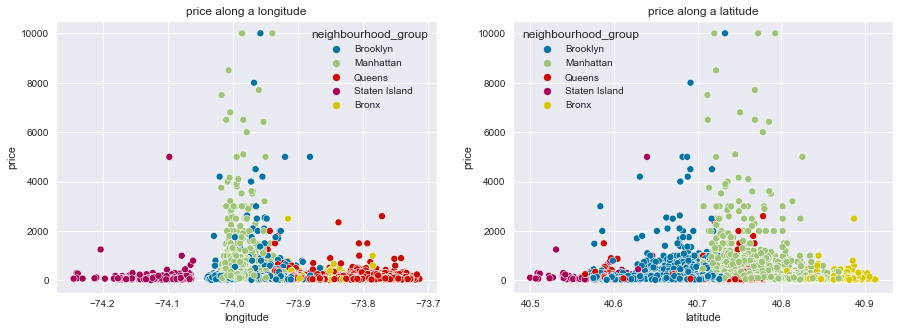

In [36]:
# visualisation 'longitude' and 'latitude'
fig=plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace=0.2, hspace=0.2)
a1 = fig.add_subplot(1,2,1)
a2 = fig.add_subplot(1,2,2)

sns.scatterplot(x='longitude', y='price', hue='neighbourhood_group', data=df, ax=a1)
sns.scatterplot(x='latitude', y='price', hue='neighbourhood_group', data=df, ax=a2)

a1.set_title('price along a longitude')
a2.set_title('price along a latitude')
plt.show()

It is evident that Manhattan and Brooklyn are the two neighborhood groups with high prices for Airbnb listings.

The scatterplot of the listings of our dataset:

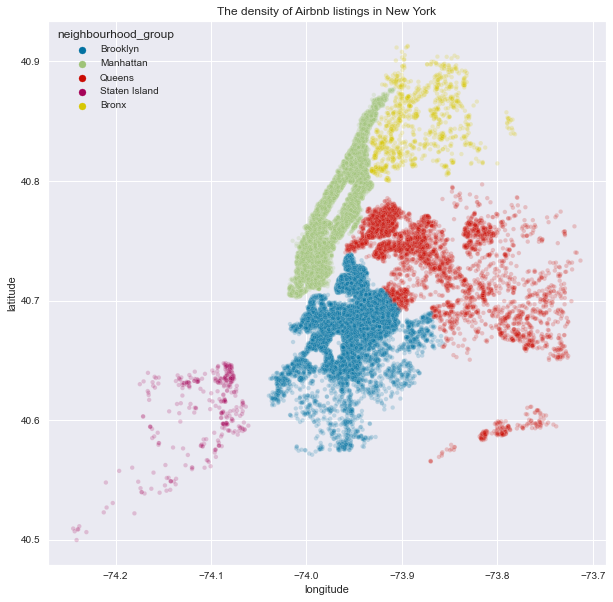

In [37]:
# visualisation 'longitude', 'latitude' and 'neighbourhood_group'
ig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', ax = ax, s = 20, alpha = 0.2, data=df);
plt.title('The density of Airbnb listings in New York');

The areas marked by thicker circles indicate a high number of Airbnb listings.

* ### 'availability_365' attribute

In [38]:
 # describe 'neighbourhood_group' and 'availability_365'
df.groupby('neighbourhood_group')['availability_365'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1034.0,174.896518,133.046695,0.0,53.25,163.0,320.75,365.0
Brooklyn,18041.0,111.744804,128.444086,0.0,0.00,51.0,219.00,365.0
Manhattan,19377.0,125.400372,134.360332,0.0,0.00,67.0,253.00,365.0
Queens,5236.0,156.454163,134.284214,0.0,23.00,132.0,301.00,365.0
Staten Island,358.0,208.044693,127.945096,0.0,86.25,231.5,333.75,365.0


In [39]:
# pivot table 'availability_365', 'room_type', and 'price'
df.pivot_table(index='availability_365',columns='room_type',values='price',aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
availability_365,,,
0,171.838251,76.143222,66.790055
1,166.841463,73.845161,50.142857
2,183.270588,84.583333,32.250000
3,164.250000,85.145631,48.333333
4,165.763975,68.571429,72.000000
...,...,...,...
361,321.969697,92.400000,43.250000
362,374.931034,114.663158,57.153846
363,280.096774,119.410853,93.812500


* ### 'neighbourhood' attribute (categorical)

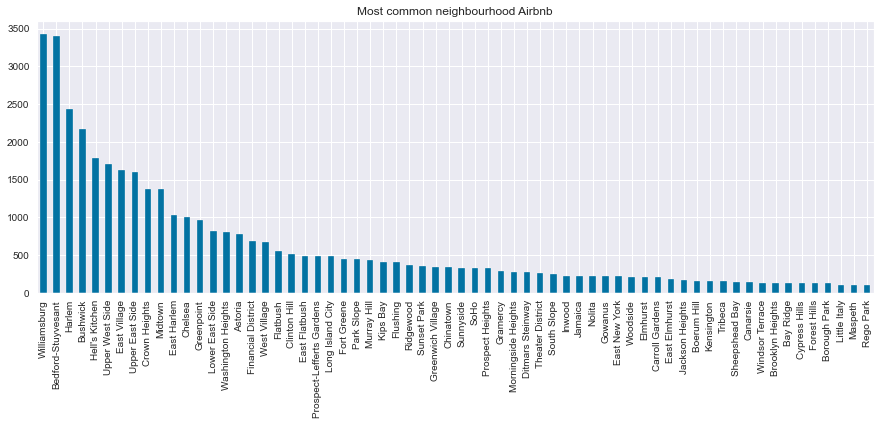

In [40]:
# visualisation 'neighbourhood' 
neigh = df['neighbourhood'].value_counts()
neigh[neigh>100].plot(figsize=(15,5), kind='bar')
plt.title('Most common neighbourhood Airbnb')
plt.show()

Williamsburg and Bedford-Stuyvesant are the neighborhoods that have a higher number of Airbnb listings compared to others.

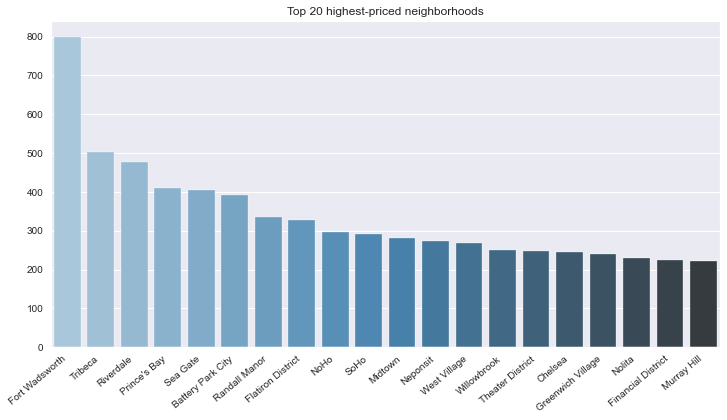

In [41]:
# visualisation 'neighbourhood'  and 'price'
d = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(d.index.tolist()[:20], d.values[:20], palette=("Blues_d"))
plt.xticks(rotation=40, ha="right")
plt.title('Top 20 highest-priced neighborhoods')
plt.show()

The table above showcases the top 20 neighborhoods with the highest prices.

* ### Business Questions Analysis

Now, let's explore our business questions.

**Business Question A. Overall Market Landscape:** What is the current economic landscape of the New York City market for long-term rental properties exceeding 30 days or 1 month in the "entire home/apartment" format?

In [42]:
# Business Question A pivot table
new_df = df[(df['room_type'] == 'Entire home/apt') & (df['minimum_nights'] > 30)]

by_room_type = pd.pivot_table(new_df,
                              index=['room_type', 'neighbourhood_group'],
                              aggfunc={'neighbourhood_group': np.size})

by_room_type = by_room_type.rename(columns={'neighbourhood_group': 'Total Number of Listings'})
by_room_type = by_room_type.sort_values(by='Total Number of Listings', ascending=False)

total_listings = by_room_type['Total Number of Listings'].sum()

# calculate percentages with two decimal places
by_room_type['Percentage'] = round((by_room_type['Total Number of Listings'] / total_listings) * 100, 2)

print("Total Number of 'Entire home/apt' Rental Properties in New York City: {}".format(total_listings))
by_room_type

Total Number of 'Entire home/apt' Rental Properties in New York City: 478


Total Number of Listings  Percentage
room_type       neighbourhood_group                                      
Entire home/apt Manhattan                                 311       65.06
                Brooklyn                                  140       29.29
                Queens                                     17        3.56
                Bronx                                       9        1.88
                Staten Island                               1        0.21

**Answer:** Out of 44,046 presented listings, 23,156 (52.6%) are classified as "entire home/apartment", and only 478 listings (approximately 2.1%) identified as long-term rental properties.
With 311 listings, Manhattan is the leading neighbourhood group for long-term rental properties, indicating a robust market for entire home/apartment rentals. Brooklyn follows Manhattan with 140 listings, offering a significant alternative to Manhattan. Queens has a smaller market share with only 17 listings, indicating limited availability compared to Manhattan and Brooklyn. The Bronx has just 9 listings, suggesting a less developed market for long-term rentals in the entire home/apartment format. Among the neighbourhood groups, Staten Island has the fewest listings with only 1, indicating a highly limited market.


**Business Question B. Neighbourhood Group Analysis:** Which neighbourhood groups within New York City demonstrate notable popularity and demand for long-term rentals of "entire home/apartment" properties, and to what extent?


In [43]:
# Business Question B pivot table
new_df = df[(df['room_type'] == 'Entire home/apt') & (df['minimum_nights'] > 30)]

by_room_type = pd.pivot_table(new_df,
                              index=['room_type', 'neighbourhood_group'],
                              values='number_of_reviews',
                              aggfunc={'neighbourhood_group': np.size, 'number_of_reviews': np.sum})

by_room_type = by_room_type.rename(columns={'neighbourhood_group': 'Total Number of Listings', 'number_of_reviews': 'Total Number of Reviews'})

# Sort by total number of listings in descending order
by_room_type = by_room_type.sort_values(by='Total Number of Listings', ascending=False)

total_listings = by_room_type['Total Number of Listings'].sum()

print("Total Number of Popular Neighbourhood Groups in New York City:")
print("Total Number of Listings: {}".format(total_listings))
by_room_type

Total Number of Popular Neighbourhood Groups in New York City:
Total Number of Listings: 478


Total Number of Listings  \
room_type       neighbourhood_group                             
Entire home/apt Manhattan                                 311   
                Brooklyn                                  140   
                Queens                                     17   
                Bronx                                       9   
                Staten Island                               1   

                                     Total Number of Reviews  
room_type       neighbourhood_group                           
Entire home/apt Manhattan                               3538  
                Brooklyn                                2437  
                Queens                                   299  
                Bronx                                     52  
                Staten Island                              0

**Answer:** Manhattan (311 listings and 3,538 reviews) stands out as the most popular neighbourhood group, indicating a high demand for long-term rentals in this area. Brooklyn (140 listings and 2,437 reviews) showcasing notable popularity. Queens (17 listings and 299 reviews) indicating a moderate level of popularity. The Bronx (9 listings and 52 reviews) demonstrates a relatively lower level of demand compared to Manhattan and Brooklyn. Finally, Staten Island (1 listing and no reviews) indicating the lowest level of popularity. 
In summary, Manhattan and Brooklyn are the most popular neighbourhood groups in New York City for long-term rentals of "entire home/apartment" properties, while Queens, the Bronx, and Staten Island have a lower level of demand.


**Business Question C. Neighbourhood Analysis:** Which specific neighbourhoods within New York City hold investment potential for the construction or purchase of long-term rental properties in the "entire home/apartment" format? Furthermore, what is the level of desirability for such properties in these neighbourhoods?

**Business Question D. Pricing Analysis:** What are the average market prices for "entire home/apartment" long-term rentals within each identified neighbourhood group and specific neighbourhood?


* #### Manhattan

In [44]:
# Business Question C&D pivot table for Manhattan
new_df_manhattan = new_df[new_df['neighbourhood_group'] == 'Manhattan']

total_listings_manhattan = new_df_manhattan.shape[0]

by_room_type_manhattan = pd.pivot_table(new_df_manhattan,
index=['neighbourhood_group', 'neighbourhood'],
values=['number_of_reviews', 'price'],
aggfunc={'number_of_reviews': np.sum, 'price': np.mean})

by_room_type_manhattan = by_room_type_manhattan.rename(columns={'number_of_reviews': 'Total Number of Reviews', 'price': 'Mean Price'})
by_room_type_manhattan = by_room_type_manhattan.sort_values(by='Total Number of Reviews', ascending=False)

print("Total Number of 'Entire home/apt' Rental Properties in Manhattan: {}".format(total_listings_manhattan))
print("Neighbourhoods in Manhattan by Number of Reviews (Highest to Lowest):")
by_room_type_manhattan

Total Number of 'Entire home/apt' Rental Properties in Manhattan: 311
Neighbourhoods in Manhattan by Number of Reviews (Highest to Lowest):


Total Number of Reviews   Mean Price
neighbourhood_group neighbourhood                                            
Manhattan           Harlem                                   676   236.437500
                    Upper West Side                          514   287.310345
                    West Village                             312   188.000000
                    Chelsea                                  299   163.680000
                    East Harlem                              243   172.600000
                    Upper East Side                          234   263.380000
                    East Village                             175   170.666667
                    Nolita                                   173   348.000000
                    Hell's Kitchen                           155   306.880000
                    Greenwich Village                        135   294.176471
                    Midtown                                  123   336.823529
                    Financial District                       113   187.000000
                    Washington Heights                        98    79.500000
                    Chinatown                                 75   176.250000
                    Lower East Side                           71   171.400000
                    Roosevelt Island                          37   762.500000
                    SoHo                                      25   251.750000
                    Little Italy                              24   149.500000
                    Morningside Heights                       16   115.250000
                    Gramercy                                  14   189.600000
                    Kips Bay                                  12   266.000000
                    Battery Park City                          5   285.833333
                    Murray Hill                                4   230.400000
                    Tribeca                                    3  3399.500000
                    Stuyvesant Town                            2   140.000000
                    Theater District                           0   144.500000
                    Flatiron District                          0   215.000000

* #### Brooklyn

In [45]:
# Business Question C&D pivot table for Brooklyn
new_df_brooklyn = new_df[new_df['neighbourhood_group'] == 'Brooklyn']

total_listings_brooklyn = new_df_brooklyn.shape[0]

by_room_type_brooklyn = pd.pivot_table(new_df_brooklyn,
index=['neighbourhood_group', 'neighbourhood'],
values=['number_of_reviews', 'price'],
aggfunc={'number_of_reviews': np.sum, 'price': np.mean})

by_room_type_brooklyn = by_room_type_brooklyn.rename(columns={'number_of_reviews': 'Total Number of Reviews', 'price': 'Mean Price'})
by_room_type_brooklyn = by_room_type_brooklyn.sort_values(by='Total Number of Reviews', ascending=False)

print("Total Number of 'Entire home/apt' Rental Properties in Brooklyn: {}".format(total_listings_brooklyn))
print("Neighbourhoods in Brooklyn by Number of Reviews (Highest to Lowest):")
by_room_type_brooklyn

Total Number of 'Entire home/apt' Rental Properties in Brooklyn: 140
Neighbourhoods in Brooklyn by Number of Reviews (Highest to Lowest):


Total Number of Reviews  \
neighbourhood_group neighbourhood                                        
Brooklyn            Bedford-Stuyvesant                             953   
                    Bushwick                                       256   
                    Williamsburg                                   216   
                    Crown Heights                                  180   
                    Carroll Gardens                                138   
                    Fort Greene                                    127   
                    Gowanus                                        118   
                    Park Slope                                     100   
                    East Flatbush                                   90   
                    Flatbush                                        61   
                    Brooklyn Heights                                35   
                    Cobble Hill                                     35   
                    Windsor Terrace                                 33   
                    South Slope                                     23   
                    Prospect-Lefferts Gardens                       21   
                    Greenpoint                                      19   
                    Sunset Park                                     18   
                    Downtown Brooklyn                                8   
                    Prospect Heights                                 4   
                    Clinton Hill                                     1   
                    Bay Ridge                                        1   
                    Gravesend                                        0   
                    Kensington                                       0   
                    Midwood                                          0   
                    Vinegar Hill                                     0   
                    Boerum Hill                                      0   

                                                Mean Price  
neighbourhood_group neighbourhood                           
Brooklyn            Bedford-Stuyvesant          148.470588  
                    Bushwick                    128.900000  
                    Williamsburg                177.029412  
                    Crown Heights               266.076923  
                    Carroll Gardens             187.000000  
                    Fort Greene                 174.166667  
                    Gowanus                     114.000000  
                    Park Slope                  138.800000  
                    East Flatbush                89.666667  
                    Flatbush                    101.000000  
                    Brooklyn Heights            133.000000  
                    Cobble Hill                 148.666667  
                    Windsor Terrace             212.000000  
                    South Slope                 130.000000  
                    Prospect-Lefferts Gardens   568.000000  
                    Greenpoint                  190.600000  
                    Sunset Park                 139.666667  
                    Downtown Brooklyn            97.000000  
                    Prospect Heights            271.500000  
                    Clinton Hill                 89.000000  
                    Bay Ridge                  2137.500000  
                    Gravesend                    85.000000  
                    Kensington                  110.000000  
                    Midwood                     113.000000  
                    Vinegar Hill                300.000000  
                    Boerum Hill                 300.000000

* #### Queens

In [46]:
# Business Question C&D pivot table for Queens
new_df_queens = new_df[new_df['neighbourhood_group'] == 'Queens']

total_listings_queens = new_df_queens.shape[0]

by_room_type_queens = pd.pivot_table(new_df_queens,
index=['neighbourhood_group', 'neighbourhood'],
values=['number_of_reviews', 'price'],
aggfunc={'number_of_reviews': np.sum, 'price': np.mean})

by_room_type_queens = by_room_type_queens.rename(columns={'number_of_reviews': 'Total Number of Reviews', 'price': 'Mean Price'})
by_room_type_queens = by_room_type_queens.sort_values(by='Total Number of Reviews', ascending=False)

print("Total Number of 'Entire home/apt' Rental Properties in Queens: {}".format(total_listings_queens))
print("Neighbourhoods in Queens by Number of Reviews (Highest to Lowest):")
by_room_type_queens

Total Number of 'Entire home/apt' Rental Properties in Queens: 17
Neighbourhoods in Queens by Number of Reviews (Highest to Lowest):


Total Number of Reviews  Mean Price
neighbourhood_group neighbourhood                                        
Queens              Ditmars Steinway                      200        69.5
                    Astoria                                48        89.5
                    Long Island City                       32       139.0
                    Rosedale                               15       350.0
                    Elmhurst                                2       100.0
                    Sunnyside                               2        80.0
                    East Elmhurst                           0       109.0
                    Forest Hills                            0      2350.0
                    Maspeth                                 0       100.0
                    Middle Village                          0       199.0
                    Rego Park                               0       108.0
                    Richmond Hill                           0       129.0

* #### Bronx

In [47]:
# Business Question C&D pivot table for Bronx
new_df_bronx = new_df[new_df['neighbourhood_group'] == 'Bronx']
total_listings_bronx = new_df_bronx.shape[0]

by_room_type_bronx = pd.pivot_table(new_df_bronx,
index=['neighbourhood_group', 'neighbourhood'],
values=['number_of_reviews', 'price'],
aggfunc={'number_of_reviews': np.sum, 'price': np.mean})

by_room_type_bronx = by_room_type_bronx.rename(columns={'number_of_reviews': 'Total Number of Reviews', 'price': 'Mean Price'})
by_room_type_bronx = by_room_type_bronx.sort_values(by='Total Number of Reviews', ascending=False)

print("Total Number of 'Entire home/apt' Rental Properties in Bronx: {}".format(total_listings_bronx))
print("Neighbourhoods in Bronx by Number of Reviews (Highest to Lowest):")
by_room_type_bronx

Total Number of 'Entire home/apt' Rental Properties in Bronx: 9
Neighbourhoods in Bronx by Number of Reviews (Highest to Lowest):


Total Number of Reviews  Mean Price
neighbourhood_group neighbourhood                                         
Bronx               Claremont Village                       28        91.5
                    Fordham                                 10        71.0
                    Mount Hope                               7        54.0
                    Spuyten Duyvil                           7        79.0
                    Parkchester                              0        70.0

* #### Staten Island

In [48]:
# Business Question C&D pivot table for Staten Island
new_df_staten_island = new_df[new_df['neighbourhood_group'] == 'Staten Island']

total_listings_staten_island = new_df_staten_island.shape[0]

by_room_type_staten_island = pd.pivot_table(new_df_staten_island,
index=['neighbourhood_group', 'neighbourhood'],
values=['number_of_reviews', 'price'],
aggfunc={'number_of_reviews': np.sum, 'price': np.mean})

by_room_type_staten_island = by_room_type_staten_island.rename(columns={'number_of_reviews': 'Total Number of Reviews', 'price': 'Mean Price'})
by_room_type_staten_island = by_room_type_staten_island.sort_values(by='Total Number of Reviews', ascending=False)

print("Total Number of 'Entire home/apt' Rental Properties in Staten Island: {}".format(total_listings_staten_island))
print("Neighbourhoods in Staten Island by Number of Reviews (Highest to Lowest):")
by_room_type_staten_island

Total Number of 'Entire home/apt' Rental Properties in Staten Island: 1
Neighbourhoods in Staten Island by Number of Reviews (Highest to Lowest):


,,Total Number of Reviews,Mean Price
neighbourhood_group,neighbourhood,,
Staten Island,St. George,0,100


**Answer for business question C:** The level of desirability based on their total number of listings and the corresponding number of reviews.

**In Manhattan**, the neighbourhoods with the highest number of reviews, indicating popularity and demand, are: 
* Harlem: 676 reviews (significant investment potential); 
* Upper West Side: 514 reviews (desirability for long-term rentals); 
* West Village, Chelsea, and East Harlem are other noteworthy neighbourhoods with substantial numbers of reviews.


**In Brooklyn**, the neighbourhoods with notable investment potential and desirability for long-term rentals are: 
* Bedford-Stuyvesant: 953 reviews (high demand); 
* Bushwick and Williamsburg are also popular neighbourhoods with significant numbers of reviews, 

**Queens**, despite having a smaller number of listings, has neighbourhoods with moderate levels of desirability based on reviews. The neighbourhoods of Ditmars Steinway and Astoria have the highest number of reviews among the Queens neighbourhoods, suggesting a certain level of investment potential.

**The Bronx and Staten Island** have a relatively lower number of listings and reviews compared to Manhattan and Brooklyn, indicating a lower level of demand and investment potential.

**Answer for business question D:** The average prices for each neighbourhood group and specific neighbourhood:
* **In Manhattan:** Neighbourhoods such as Nolita, Hell's Kitchen, and Greenwich Village have higher average prices, ranging from 294 dollars to 348 dollars; Roosevelt Island stands out with an average price of 762.50 dollars, indicating a higher-end rental market; other neighbourhoods have relatively lower average prices, ranging from 79.50 dollars to 287.31 dollars.

* **In Brooklyn:** Neighbourhoods like Crown Heights, Carroll Gardens, and Windsor Terrace have average prices ranging from  114 dollars to 266 dollars; Prospect-Lefferts Gardens and Greenpoint show higher average prices of  568 dollars and  190.60 dollars, respectively; Some neighbourhoods have lower average prices, such as Downtown Brooklyn with 97 dollars and Clinton Hill with 89 dollars.

* **In Queens:** Ditmars Steinway and Astoria have average prices of 69.50 dollars and 89.50 dollars, respectively; Long Island City shows a slightly higher average price of 139 dollars, indicating a relatively more expensive rental market.

* **In The Bronx and Staten Island:** The Bronx neighbourhoods have average prices ranging from 54 dollars to 91.50 dollars, representing relatively more affordable options; Staten Island's St. George neighbourhood has an average price of 100 dollars.

### Encoding of the Categorical data

For our purposes, we are applying a **label encoding** technique.

In [49]:
# label encoding for 'room_type'
le_room_type = LabelEncoder()
df['room_type'] = le_room_type.fit_transform(df.room_type.values)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,,,,,,,,,,
2539,Brooklyn,Kensington,40.64749,-73.97237,1,149,1,9,6,365
2595,Manhattan,Midtown,40.75362,-73.98377,0,225,1,45,2,355
3647,Manhattan,Harlem,40.80902,-73.94190,1,150,3,0,1,365
3831,Brooklyn,Clinton Hill,40.68514,-73.95976,0,89,1,270,1,194
5022,Manhattan,East Harlem,40.79851,-73.94399,0,80,10,9,1,0


**room_type == 0 means Entire home/apt**

**room_type == 1 means Private room**

**room_type == 2 means Shared room**

We understand that a good Exploratory Data Analysis (EDA) should include Skewness and Kurtosis, data distribution analysis, correlation list and matrix, and the use of StandardScaler. However, we will skip these steps for the following reasons:

1. If we apply log transformation to attributes such as "price" and "minimum_nights", we will not be able to visualize the actual prices and number of nights accurately.

2. If we use Label Encoding for all categorical attributes, we will lose the ability to identify the actual names of neighbourhoods and neighbourhood groups in our visualizations. We have only applied Label Encoding to the "room_type" attribute for our analysis.

3. Applying StandardScaler would prevent us from accurately locating the clusters on the real map of New York City. Therefore, we have chosen to preserve the original values for better visualization and understanding of the cluster locations.

4. The presence of a correlation list and matrix is not relevant to our business questions, so we have decided not to include it in our solution.

Considering these reasons, we have decided to omit these specific steps in our EDA to focus on addressing our business objectives.

In [50]:
# dataset shape
df.shape

(44046, 10)

# Part 3: Machine Learning.

We have chosen the **K-Means algorithm** to implement our solution. Although we also explored the **DBSCAN** algorithm, K-Means has shown better results in addressing our business questions.

### K-Means algorithm

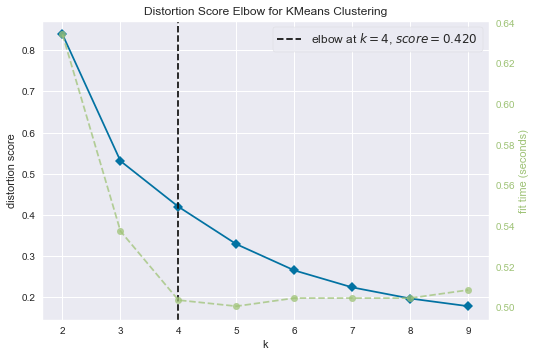

In [51]:
# select relevant columns for clustering
fields = ['latitude', 'longitude']

# perform k-means clustering with elbow method for optimal cluster selection
def clustering_kelbow_score(data, min_clusters=2, max_clusters=10, fields=[]):
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(min_clusters, max_clusters))
    visualizer.fit(data[fields])
    visualizer.show()
    return visualizer.elbow_value_

# filter data based on room type and minimum nights
cluster_df = df[(df['room_type'] == 0) & (df['minimum_nights'] > 30)]

# Determine the optimal number of clusters
estimated_clusters_num = clustering_kelbow_score(cluster_df, fields=fields)

# perform k-means clustering
kmeans = KMeans(n_clusters=estimated_clusters_num, random_state=0)
cluster_df['cluster_labels'] = kmeans.fit_predict(cluster_df[fields])


The elbow point, which is found at **4 clusters**, indicates that using 4 clusters strikes a good balance in capturing the underlying patterns and structure in the data. As well as this choice avoids excessive complexity or overfitting. 

In [52]:
# returns an array containing the cluster labels
kmeans.labels_

array([0, 0, 1, 3, 0, 0, 0, 2, 2, 3, 3, 1, 1, 2, 0, 0, 3, 0, 1, 2, 2, 0,
       2, 2, 3, 3, 1, 0, 0, 3, 0, 3, 2, 0, 1, 3, 2, 2, 0, 1, 1, 1, 0, 1,
       0, 2, 1, 0, 0, 1, 0, 0, 3, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 3, 0,
       2, 3, 0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 0, 1, 2, 3, 1, 0, 0, 0, 1, 0,
       1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 3, 1, 1, 3, 1, 0, 0, 2, 1,
       1, 0, 3, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 0, 0,
       1, 0, 3, 0, 2, 2, 1, 0, 0, 0, 3, 2, 2, 0, 3, 1, 3, 1, 0, 1, 3, 0,
       1, 1, 1, 1, 0, 2, 1, 3, 2, 3, 0, 2, 1, 1, 3, 1, 2, 3, 1, 2, 3, 1,
       1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0,
       0, 0, 3, 0, 0, 3, 0, 0, 2, 2, 1, 2, 3, 0, 0, 0, 0, 2, 1, 2, 3, 3,
       1, 1, 1, 3, 0, 1, 3, 2, 3, 1, 1, 1, 1, 3, 0, 1, 1, 1, 2, 0, 0, 0,
       0, 2, 3, 2, 1, 0, 3, 2, 0, 1, 0, 2, 1, 2, 2, 3, 1, 2, 2, 1, 1, 1,
       1, 3, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 3, 0, 3, 0, 2, 0, 0,
       1, 1, 3, 3, 3, 3, 0, 2, 1, 1, 1, 0, 0, 1, 1,

In [53]:
# print the cluster labels
print("Cluster Labels:")
print(cluster_df['cluster_labels'])

Cluster Labels:
id
6090        0
15396       0
19159       1
25235       3
36703       0
           ..
36008082    3
36056808    0
36108714    3
36270376    2
36426319    1
Name: cluster_labels, Length: 478, dtype: int32


Silhouette Score: 0.4638275849406755


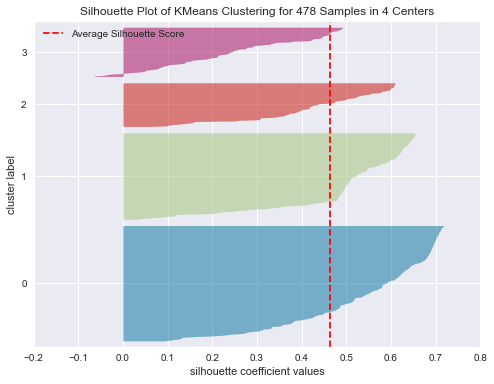

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 478 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
# calculate Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(cluster_df[fields], cluster_df['cluster_labels'])
print("Silhouette Score:", silhouette_avg)

# visualize Silhouette Scores
fig, ax = plt.subplots(figsize=(8, 6))
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(cluster_df[fields])
visualizer.show()

The Silhouette Score of 0.4638275849406755 indicates a moderate level of separation and cohesion. It implies that the K-Means algorithm has successfully grouped the data points, but there may still be some overlapping or ambiguity in the assignments. Further analysis and fine-tuning of the clustering parameters could potentially improve the cluster quality and enhance the separation among the clusters.

In [55]:
# display head of clusters
clusters_head = cluster_df.groupby('cluster_labels').head()
clusters_head.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,cluster_labels
id,,,,,,,,,,,
6090,Manhattan,West Village,40.73530,-74.00525,0,120,90,27,1,0,0
15396,Manhattan,Chelsea,40.74623,-73.99530,0,375,180,5,1,180,0
19159,Manhattan,Harlem,40.82915,-73.95136,0,110,31,54,1,209,1
25235,Brooklyn,Bedford-Stuyvesant,40.68373,-73.92377,0,125,90,162,2,137,3
36703,Manhattan,West Village,40.73226,-74.00401,0,225,45,134,1,312,0


In [56]:
# visualisation all clusters
# this function is used to help plot the maps
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

# set color for clusters
num_clusters = len(cluster_df['cluster_labels'].unique())
palette = ['red', 'blue', 'green', 'orange']  # add or modify colors in the palette

# create the folium map
map_cluster = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# set the marker for the map
markers_colors = []
for lat, lng, cluster in zip(cluster_df['latitude'], cluster_df['longitude'], cluster_df['cluster_labels']):
    label = folium.Popup('Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lng],
                        radius=2,
                        popup=label,
                        color=palette[cluster],
                        fill=True,
                        fill_color=palette[cluster],
                        fill_opacity=0.7).add_to(map_cluster)

embed_map(map_cluster, 'map_cluster.html')

#### Cluster 0

In [57]:
# cluster 0 head
cluster_0_data = cluster_df[cluster_df['cluster_labels'] == 0]
print("Cluster 0 Count:", len(cluster_0_data))
cluster_0_data.head()

Cluster 0 Count: 187


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,cluster_labels
id,,,,,,,,,,,
6090,Manhattan,West Village,40.73530,-74.00525,0,120,90,27,1,0,0
15396,Manhattan,Chelsea,40.74623,-73.99530,0,375,180,5,1,180,0
36703,Manhattan,West Village,40.73226,-74.00401,0,225,45,134,1,312,0
61509,Manhattan,Midtown,40.75749,-73.96897,0,110,200,92,1,140,0
62427,Manhattan,East Village,40.72680,-73.99079,0,130,50,56,1,56,0


In [58]:
# describe cluster 0 
cluster_0_data = cluster_df[cluster_df['cluster_labels'] == 0]
print("Cluster 0 Count:", len(cluster_0_data))
print("Descriptive Statistics for Cluster 0:")
cluster_0_data.describe()

Cluster 0 Count: 187
Descriptive Statistics for Cluster 0:


,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,cluster_labels
count,187.000000,187.000000,187.0,187.000000,187.000000,187.000000,187.000000,187.000000,187.0
mean,40.738510,-73.991686,0.0,291.288770,113.973262,9.433155,16.427807,212.839572,0.0
std,0.017888,0.012490,0.0,576.815928,142.972230,21.064662,48.733297,133.235243,0.0
min,40.700990,-74.017730,0.0,80.000000,31.000000,0.000000,1.000000,0.000000,0.0
25%,40.726290,-73.998825,0.0,130.000000,35.000000,0.000000,1.000000,88.500000,0.0
50%,40.737860,-73.993140,0.0,160.000000,70.000000,2.000000,1.000000,235.000000,0.0
75%,40.751900,-73.983810,0.0,250.000000,120.000000,9.000000,5.000000,342.000000,0.0
max,40.771120,-73.955150,0.0,6500.000000,1250.000000,163.000000,232.000000,365.000000,0.0


In [59]:
# visualisation cluster 0
# this function is used to help plot the maps 
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

# set color for the desired cluster
cluster_color = 'red'

# filter data for the desired cluster
desired_cluster_data = cluster_0_data

# create the folium map
map_cluster = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# set the marker for the map
for lat, lng in zip(desired_cluster_data['latitude'], desired_cluster_data['longitude']):
    label = folium.Popup('Cluster 0', parse_html=True)
    folium.CircleMarker([lat, lng],
                        radius=2,
                        popup=label,
                        color=cluster_color,
                        fill=True,
                        fill_color=cluster_color,
                        fill_opacity=0.7).add_to(map_cluster)

embed_map(map_cluster, 'map_cluster.html')

#### Cluster 1

In [60]:
# cluster 1 head
cluster_1_data = cluster_df[cluster_df['cluster_labels'] == 1]
print("Cluster 1 Count:", len(cluster_1_data))
cluster_1_data.head()

Cluster 1 Count: 140


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,cluster_labels
id,,,,,,,,,,,
19159,Manhattan,Harlem,40.82915,-73.95136,0,110,31,54,1,209,1
166006,Manhattan,Upper West Side,40.80006,-73.96049,0,250,31,188,1,259,1
168810,Manhattan,Upper West Side,40.78569,-73.97581,0,175,65,11,1,358,1
272026,Manhattan,Washington Heights,40.85774,-73.92901,0,56,122,20,1,216,1
577324,Queens,Ditmars Steinway,40.76961,-73.90451,0,54,45,198,1,80,1


In [61]:
# describe cluster 1 
cluster_1_data = cluster_df[cluster_df['cluster_labels'] == 1]
print("Cluster 1 Count:", len(cluster_1_data))
print("Descriptive Statistics for Cluster 1:")
cluster_1_data.describe()

Cluster 1 Count: 140
Descriptive Statistics for Cluster 1:


,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,cluster_labels
count,140.000000,140.000000,140.0,140.000000,140.000000,140.000000,140.000000,140.000000,140.0
mean,40.800366,-73.949209,0.0,193.321429,76.378571,14.814286,9.500000,219.642857,1.0
std,0.025559,0.018007,0.0,331.695563,103.571716,37.212705,12.857548,125.125898,0.0
min,40.760620,-73.983180,0.0,48.000000,31.000000,0.000000,1.000000,0.000000,1.0
25%,40.778227,-73.956220,0.0,100.000000,31.000000,0.750000,1.000000,92.500000,1.0
50%,40.793860,-73.950420,0.0,142.500000,37.500000,3.000000,2.000000,249.500000,1.0
75%,40.823820,-73.942980,0.0,200.000000,90.000000,8.000000,14.500000,333.000000,1.0
max,40.880580,-73.860420,0.0,3200.000000,999.000000,235.000000,33.000000,365.000000,1.0


In [62]:
# visualisation cluster 1
# this function is used to help plot the maps
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

# set color for the desired cluster
cluster_color = 'blue'

# filter data for the desired cluster
desired_cluster_data = cluster_1_data

# create the folium map
map_cluster = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# set the marker for the map
for lat, lng in zip(desired_cluster_data['latitude'], desired_cluster_data['longitude']):
    label = folium.Popup('Cluster 1', parse_html=True)
    folium.CircleMarker([lat, lng],
                        radius=2,
                        popup=label,
                        color=cluster_color,
                        fill=True,
                        fill_color=cluster_color,
                        fill_opacity=0.7).add_to(map_cluster)

embed_map(map_cluster, 'map_cluster.html')

#### Cluster 2

In [63]:
# cluster 2 head
cluster_2_data = cluster_df[cluster_df['cluster_labels'] == 2]
print("Cluster 2 Count:", len(cluster_2_data))
cluster_2_data.head()

Cluster 2 Count: 71


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,cluster_labels
id,,,,,,,,,,,
83446,Brooklyn,Fort Greene,40.68819,-73.97258,0,130,35,5,1,135,2
94209,Brooklyn,Crown Heights,40.67473,-73.94494,0,100,90,0,1,365,2
253332,Brooklyn,Sunset Park,40.66230,-73.99049,0,96,120,13,1,204,2
276216,Brooklyn,Sunset Park,40.65992,-73.99042,0,127,180,1,1,365,2
287845,Brooklyn,Carroll Gardens,40.68128,-73.99522,0,275,31,121,1,305,2


In [64]:
# describe cluster 2  
cluster_2_data = cluster_df[cluster_df['cluster_labels'] == 2]
print("Cluster 2 Count:", len(cluster_2_data))
print("Descriptive Statistics for Cluster 2:")
cluster_2_data.describe()

Cluster 2 Count: 71
Descriptive Statistics for Cluster 2:


,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,cluster_labels
count,71.000000,71.000000,71.0,71.000000,71.000000,71.000000,71.000000,71.000000,71.0
mean,40.665595,-73.975501,0.0,255.845070,100.915493,14.450704,1.295775,151.577465,2.0
std,0.021187,0.022336,0.0,602.994235,101.762293,25.098542,1.223512,137.261342,0.0
min,40.598460,-74.079870,0.0,69.000000,31.000000,0.000000,1.000000,0.000000,2.0
25%,40.657930,-73.986910,0.0,94.000000,31.500000,1.000000,1.000000,2.000000,2.0
50%,40.668750,-73.975550,0.0,115.000000,60.000000,4.000000,1.000000,122.000000,2.0
75%,40.680375,-73.958645,0.0,180.000000,90.000000,16.000000,1.000000,285.000000,2.0
max,40.698910,-73.937980,0.0,4200.000000,365.000000,121.000000,11.000000,365.000000,2.0


In [65]:
# visualisation cluster 2
# this function is used to help plot the maps
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

# set color for the desired cluster
cluster_color = 'green'

# filter data for the desired cluster
desired_cluster_data = cluster_2_data

# create the folium map
map_cluster = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# set the marker for the map
for lat, lng in zip(desired_cluster_data['latitude'], desired_cluster_data['longitude']):
    label = folium.Popup('Cluster 2', parse_html=True)
    folium.CircleMarker([lat, lng],
                        radius=2,
                        popup=label,
                        color=cluster_color,
                        fill=True,
                        fill_color=cluster_color,
                        fill_opacity=0.7).add_to(map_cluster)

embed_map(map_cluster, 'map_cluster.html')

#### Cluster 3

In [66]:
# cluster 3 head
cluster_3_data = cluster_df[cluster_df['cluster_labels'] == 3]
print("Cluster 3 Count:", len(cluster_3_data))
cluster_3_data.head()

Cluster 3 Count: 80


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,cluster_labels
id,,,,,,,,,,,
25235,Brooklyn,Bedford-Stuyvesant,40.68373,-73.92377,0,125,90,162,2,137,3
155296,Brooklyn,Williamsburg,40.71624,-73.96272,0,255,45,39,1,89,3
157673,Brooklyn,Bedford-Stuyvesant,40.68101,-73.94081,0,72,31,88,1,164,3
263502,Brooklyn,Williamsburg,40.72059,-73.95670,0,185,180,24,1,0,3
568661,Brooklyn,Bushwick,40.70779,-73.92129,0,110,90,32,1,330,3


In [67]:
# describe cluster 3 
cluster_3_data = cluster_df[cluster_df['cluster_labels'] == 3]
print("Cluster 3 Count:", len(cluster_3_data))
print("Descriptive Statistics for Cluster 3:")
cluster_3_data.describe()

Cluster 3 Count: 80
Descriptive Statistics for Cluster 3:


,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,cluster_labels
count,80.000000,80.000000,80.0,80.000000,80.000000,80.000000,80.000000,80.000000,80.0
mean,40.708563,-73.935903,0.0,185.350000,104.962500,18.275000,1.575000,177.187500,3.0
std,0.020336,0.034993,0.0,263.529601,104.682576,51.437556,3.363147,133.194071,0.0
min,40.666230,-73.967670,0.0,60.000000,31.000000,0.000000,1.000000,0.000000,3.0
25%,40.692215,-73.955635,0.0,100.000000,31.000000,0.000000,1.000000,53.750000,3.0
50%,40.710965,-73.945115,0.0,118.000000,60.000000,2.000000,1.000000,167.000000,3.0
75%,40.719990,-73.928623,0.0,200.000000,123.250000,10.250000,1.000000,323.000000,3.0
max,40.755030,-73.735290,0.0,2350.000000,500.000000,314.000000,31.000000,365.000000,3.0


In [68]:
# visualisation cluster 3
# this function is used to help plot the maps
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

# set color for the desired cluster
cluster_color = 'orange'

# filter data for the desired cluster
desired_cluster_data = cluster_3_data

# create the folium map
map_cluster = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# set the marker for the map
for lat, lng in zip(desired_cluster_data['latitude'], desired_cluster_data['longitude']):
    label = folium.Popup('Cluster 0', parse_html=True)
    folium.CircleMarker([lat, lng],
                        radius=2,
                        popup=label,
                        color=cluster_color,
                        fill=True,
                        fill_color=cluster_color,
                        fill_opacity=0.7).add_to(map_cluster)

embed_map(map_cluster, 'map_cluster.html')

#### All clusters

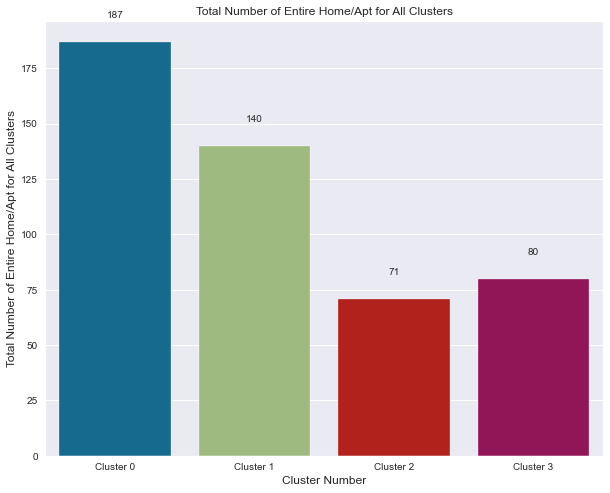

In [69]:
# visualisation all clusters
cluster_sizes = [len(cluster_0_data), len(cluster_1_data), len(cluster_2_data), len(cluster_3_data)]
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

df_clu = pd.DataFrame({'Cluster Number': cluster_names, 'Total Number of Entire Home/Apt': cluster_sizes})

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=df_clu, x='Cluster Number', y='Total Number of Entire Home/Apt')
plt.xlabel('Cluster Number', fontsize=12)
plt.ylabel('Total Number of Entire Home/Apt for All Clusters', fontsize=12)
plt.title('Total Number of Entire Home/Apt for All Clusters', fontsize=12)

# add value labels to the bars
for i, v in enumerate(cluster_sizes):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

Two clustering algorithms, namely **K-Means and DBSCAN**, were employed in this analysis. However, for a cleaner and more focused solution, we have decided to present only the results obtained from the **K-Means** algorithm.

The **"k-means++"** initialization method has been selected for K-Means clustering. Various experiments on the dataset showed a degraded performance and lower **Silhouette Score** for random centroid initialization. Updated of **"n_init"** setting, which defines how many times k-means runs with different centroids, also did not improve either the clustering result or the score. Both **"lloyd"** and **"elkan"** algorithms for the "algorithm" setting showed similar performance, and the default settings were used for further clustering. Experiments with the number of clusters showed degraded performance in all cases when the value different from the **Elbow method** result was used.

For **DBSCAN**, default settings were used, except the maximum distance between samples and the minimal count of samples to form a cluster. Other settings manipulation did not show any visible difference in results.
For **"eps"** and **"min_samples"**, the values were chosen to correspond to the nature of the dataset and particular parameters for clustering. However, the heterogeneous distribution of the geo data, with significant gaps in between coordinates and a low count of samples,  provided questionable results, either one big cluster and big chunks of noise data or many clusters with most samples in a big one.

In [70]:
# save cluster_df as a .csv file
cluster_df.to_csv('cluster_dataset.csv', index=False)